In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

In [10]:
df = pd.read_csv("/content/ObesityDataSet.csv")

In [11]:
print(df.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
import pandas as pd





target_column = 'NObeyesdad'


if df[target_column].dtype == 'object' or df[target_column].nunique() < 20:
    print("🔵 Problem Type: Classification")
else:
    print("🟢 Problem Type: Regression")


🔵 Problem Type: Classification


In [14]:
missing_values = df.isnull().sum()


missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print("✅ No missing values found in the dataset.")
else:
    print("⚠️ Missing values detected:")
    print(missing_values)

✅ No missing values found in the dataset.


In [15]:
target_column = 'NObeyesdad'

# Check if the target column exists
if target_column in df.columns:
    print(f"✅ Target column found: '{target_column}'")
    print("\nTarget Column Details:")
    print("-" * 30)
    print(f"Data Type: {df[target_column].dtype}")
    print(f"Number of Unique Classes/Values: {df[target_column].nunique()}")
    print(f"Unique Classes/Values:\n{df[target_column].unique()}")
else:
    print("❌ Target column not found. Please check the column name!")

✅ Target column found: 'NObeyesdad'

Target Column Details:
------------------------------
Data Type: object
Number of Unique Classes/Values: 7
Unique Classes/Values:
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [16]:
duplicate_rows = df.duplicated()

# Total number of duplicate rows
total_duplicates = duplicate_rows.sum()

if total_duplicates == 0:
    print("✅ No duplicate rows found in the dataset.")
else:
    print(f"⚠️ Total duplicate rows found: {total_duplicates}")
    # Optionally, display the duplicate rows
    print("\nDuplicate Rows:")
    print(df[duplicate_rows])

⚠️ Total duplicate rows found: 24

Duplicate Rows:
     Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
98   Female  21.0    1.52    42.0                             no   no   3.0   
106  Female  25.0    1.57    55.0                             no  yes   2.0   
174    Male  21.0    1.62    70.0                             no  yes   2.0   
179    Male  21.0    1.62    70.0                             no  yes   2.0   
184    Male  21.0    1.62    70.0                             no  yes   2.0   
209  Female  22.0    1.69    65.0                            yes  yes   2.0   
309  Female  16.0    1.66    58.0                             no   no   2.0   
460  Female  18.0    1.62    55.0                            yes  yes   2.0   
467    Male  22.0    1.74    75.0                            yes  yes   3.0   
496    Male  18.0    1.72    53.0                            yes  yes   2.0   
527  Female  21.0    1.52    42.0                             no  yes   3.0   
6

In [17]:
df = df.drop_duplicates()

# Confirm removal
print("✅ Duplicates removed successfully!")

✅ Duplicates removed successfully!


In [18]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Function to detect outliers using IQR
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Checking outliers for each numerical column
for col in numerical_cols:
    outliers = detect_outliers(df, col)
    print(f"🔍 Column: {col}")
    if outliers.empty:
        print("✅ No outliers found.\n")
    else:
        print(f"⚠️ Outliers found: {len(outliers)} rows\n")

🔍 Column: Age
⚠️ Outliers found: 167 rows

🔍 Column: Height
⚠️ Outliers found: 1 rows

🔍 Column: Weight
⚠️ Outliers found: 1 rows

🔍 Column: FCVC
✅ No outliers found.

🔍 Column: NCP
⚠️ Outliers found: 577 rows

🔍 Column: CH2O
✅ No outliers found.

🔍 Column: FAF
✅ No outliers found.

🔍 Column: TUE
✅ No outliers found.



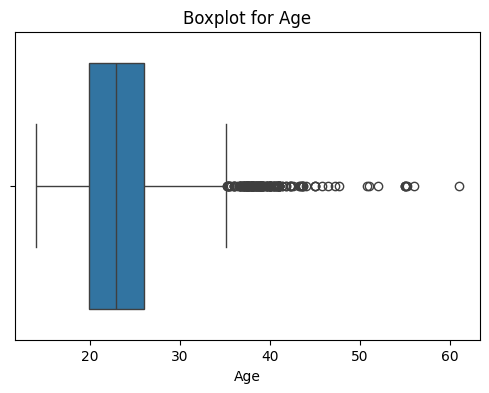

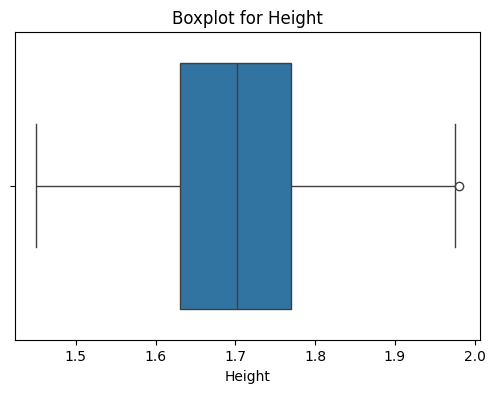

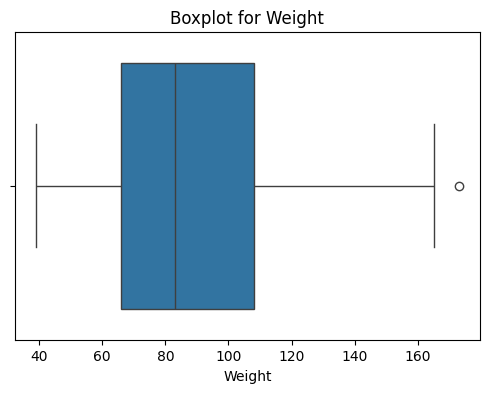

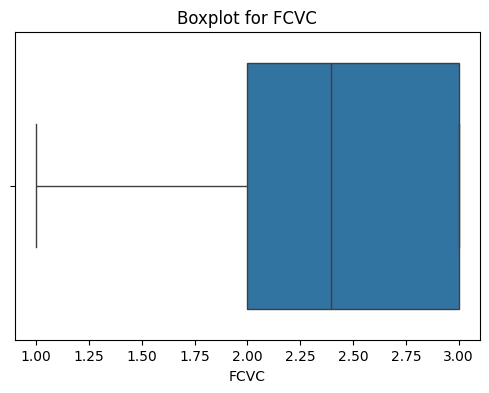

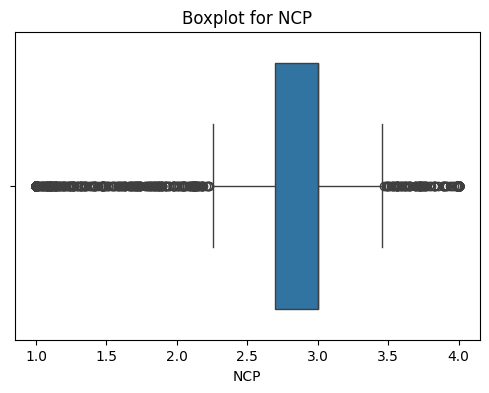

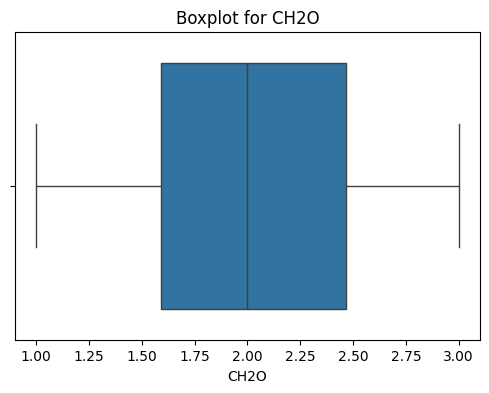

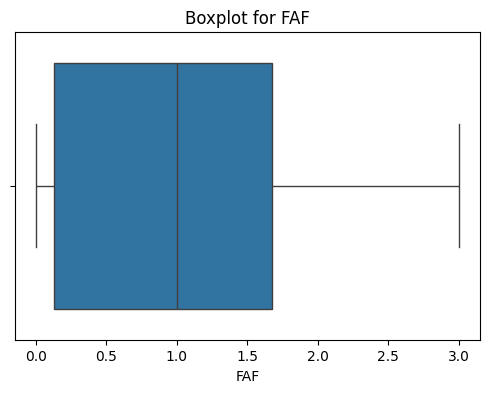

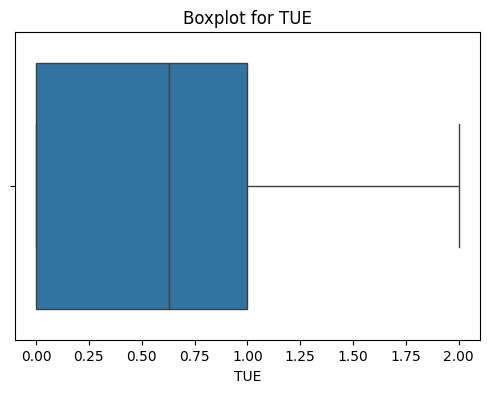

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [20]:
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

# Example: Remove outliers from 'Weight' column (aap apne column choose karo)
df_cleaned = remove_outliers_iqr(df, 'Weight')

print("Original data shape:", df.shape)
print("After removing outliers:", df_cleaned.shape)

Original data shape: (2087, 17)
After removing outliers: (2086, 17)


In [21]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [23]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.drop('NObeyesdad', axis=1)

X = pd.get_dummies(X)

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)

# View Scores
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']

print(featureScores.nlargest(10, 'Score'))

                              Feature         Score
2                              Weight  13961.698664
0                                 Age    626.045002
10  family_history_with_overweight_no    509.678165
15                    CAEC_Frequently    438.185377
8                       Gender_Female    331.404184
9                         Gender_Male    326.048793
12                            FAVC_no    204.347546
25                            CALC_no    183.439708
14                        CAEC_Always    128.001935
21                            SCC_yes    122.141584


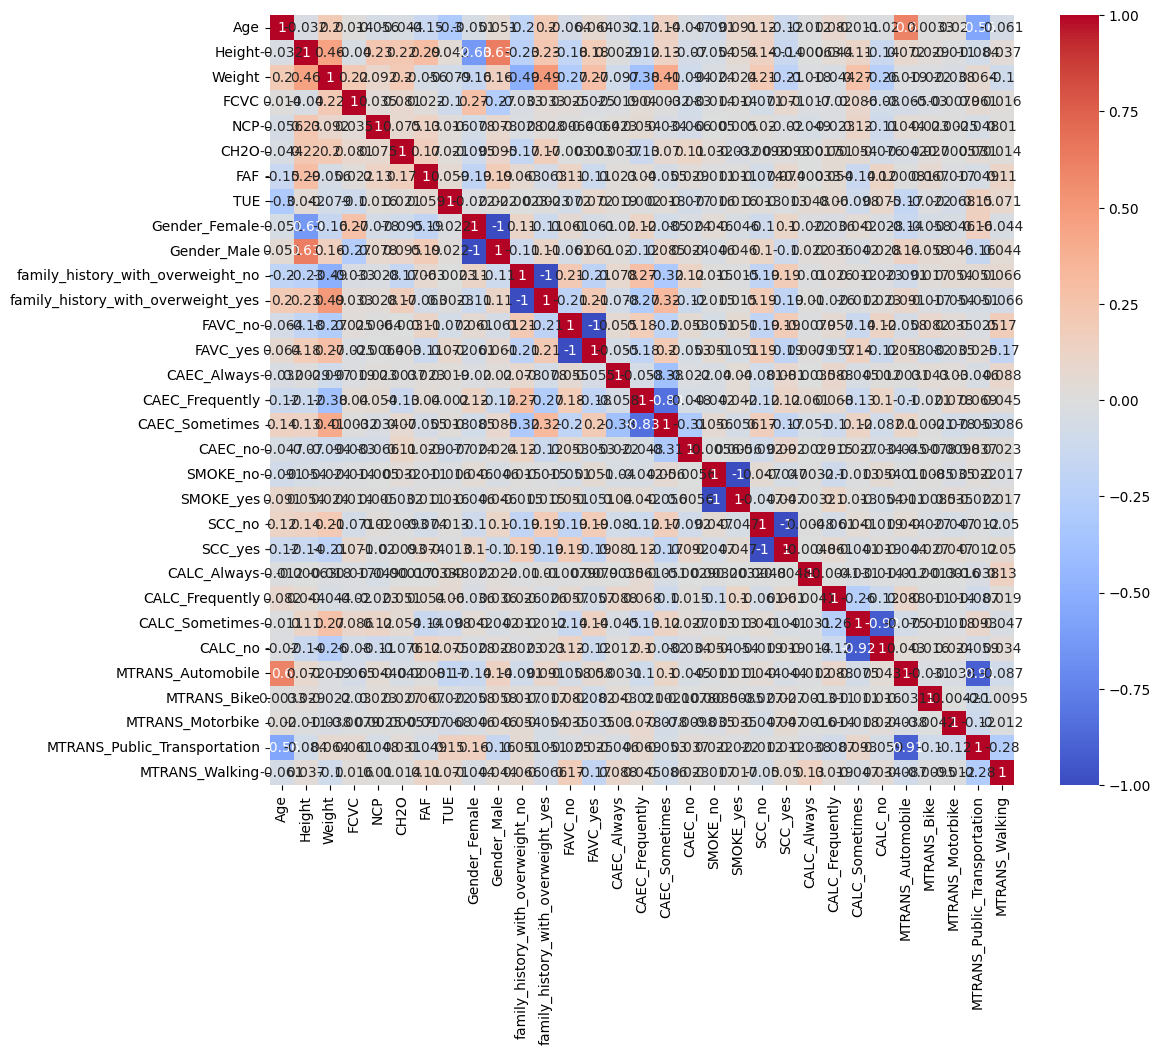

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate correlation matrix
corrmat = X.corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corrmat, annot=True, cmap="coolwarm")
plt.show()


In [27]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression




# Separate input and output
X = df.drop('NObeyesdad', axis=1)   # Features
y = df['NObeyesdad']                # Target


X = pd.get_dummies(X)

# Model
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

# Output
selected_features = X.columns[fit.support_]
print("Selected Features:", list(selected_features))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected Features: ['Height', 'FCVC', 'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no', 'FAVC_yes', 'CAEC_Frequently', 'SCC_yes', 'CALC_Sometimes', 'MTRANS_Public_Transportation']


In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder



# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print(df.head())


   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6  


In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler



# Encode categorical features (if any)
df = pd.get_dummies(df)

# Separate features and target
X = df.drop('NObeyesdad_Insufficient_Weight', axis=1, errors='ignore')  # Adjust target column
# (Yahan 'NObeyesdad' ka encoding ke baad naya naam ho sakta hai, isiliye adjust karo.)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_df.head())


     Gender       Age    Height    Weight  family_history_with_overweight  \
0 -1.008179 -0.526613 -0.887408 -0.872985                        0.460394   
1 -1.008179 -0.526613 -1.960788 -1.178508                        0.460394   
2  0.991887 -0.212507  1.044677 -0.376509                        0.460394   
3  0.991887  0.415705  1.044677  0.005395                       -2.172052   
4  0.991887 -0.369560  0.830001  0.112328                       -2.172052   

       FAVC      FCVC       NCP      CAEC     SMOKE      CH2O       SCC  \
0 -2.754719 -0.788364  0.390906  0.318128 -0.146755 -0.007810 -0.219584   
1 -2.754719  1.082164  0.390906  0.318128  6.814090  1.636552  4.554073   
2 -2.754719 -0.788364  0.390906  0.318128 -0.146755 -0.007810 -0.219584   
3 -2.754719  1.082164  0.390906  0.318128 -0.146755 -0.007810 -0.219584   
4 -2.754719 -0.788364 -2.225418  0.318128 -0.146755 -0.007810 -0.219584   

        FAF       TUE      CALC    MTRANS  NObeyesdad  
0 -1.186977  0.554211  1.41183

In [30]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaling
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Convert back to dataframe
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

print(X_normalized_df.head())


   Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0     0.0  0.148936  0.320755  0.186567                             1.0   0.0   
1     0.0  0.148936  0.132075  0.126866                             1.0   0.0   
2     1.0  0.191489  0.660377  0.283582                             1.0   0.0   
3     1.0  0.276596  0.660377  0.358209                             0.0   0.0   
4     1.0  0.170213  0.622642  0.379104                             0.0   0.0   

   FCVC       NCP      CAEC  SMOKE  CH2O  SCC       FAF  TUE      CALC  \
0   0.5  0.666667  0.666667    0.0   0.5  0.0  0.000000  0.5  1.000000   
1   1.0  0.666667  0.666667    1.0   1.0  1.0  1.000000  0.0  0.666667   
2   0.5  0.666667  0.666667    0.0   0.5  0.0  0.666667  0.5  0.333333   
3   1.0  0.666667  0.666667    0.0   0.5  0.0  0.666667  0.0  0.333333   
4   0.5  0.000000  0.666667    0.0   0.5  0.0  0.000000  0.0  0.666667   

   MTRANS  NObeyesdad  
0    0.75    0.166667  
1    0.75    0.16666

In [31]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder



# Step 2: Encode categorical variables
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

X = pd.get_dummies(X)  # One hot encoding
le = LabelEncoder()
y = le.fit_transform(y)  # Target encoding


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   int64  
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   int64  
 5   FAVC                            2087 non-null   int64  
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   int64  
 9   SMOKE                           2087 non-null   int64  
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   int64  
 12  FAF                             2087 no

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Accuracy: 0.8636363636363636


In [34]:
from sklearn.tree import DecisionTreeClassifier

# Train
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))


Decision Tree Accuracy: 0.9234449760765551


In [35]:
from sklearn.ensemble import RandomForestClassifier

# Train
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))


Random Forest Accuracy: 0.9641148325358851


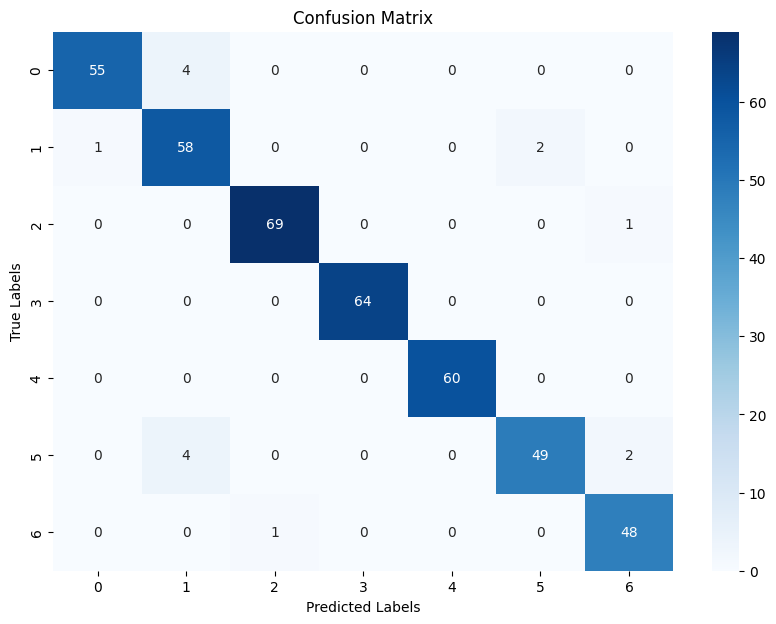

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assume y_test and y_pred are already available

# Step 1: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Step 2: Plot
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [38]:
from sklearn.metrics import classification_report

# Step 1: Classification Report
report = classification_report(y_test, y_pred, target_names=[str(cls) for cls in le.classes_]) # Convert le.classes_ to a list of strings

# Step 2: Print
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96        59
           1       0.88      0.95      0.91        61
           2       0.99      0.99      0.99        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.96      0.89      0.92        55
           6       0.94      0.98      0.96        49

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.97      0.96      0.96       418



In [39]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)  # Top 10 features
X_new = selector.fit_transform(X_scaled, y)

print("Selected Features:", X.columns[selector.get_support()])


Selected Features: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'CAEC', 'CALC', 'MTRANS'],
      dtype='object')
